# Comprar o número de infetados com o tamanho da população
Assim vai ser possivel ver quais os paises com mais infetados, tendo em conta o tamanho da sua população.

# Comprar o número de infetados com as economias dos países
Fazer uma média de infetados de países destes tipos de economia:
1. Developed region: G7
2. Developed region: nonG7
3. Emerging region: BRIC
4. Emerging region: MIKT
5. Emerging region: G20
6. Developing region
7. Least developed region

## Vai buscar todos os dados e prepara o qgis

In [1]:
debug=False

import pandas as pd
df = pd.read_csv("time_series_covid19_confirmed_global.csv")

import os
import sys
from osgeo import ogr
#os.environ['QT_QPA_PLATFORM'] = 'offscreen'
#sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
#QgsApplication.setPrefixPath("/usr/local", True) 
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
if debug==True:
    print(QgsApplication.showSettings())
    
from PyQt5.QtCore import QVariant
import pandas as pd

data = "ne_10m_admin_0_countries.shp"

conn = ogr.Open(data)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(data, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))


paises = QgsProject.instance().mapLayersByName('ne_10m_admin_0_countries')[0]
print(type(paises))

Layer ne_10m_admin_0_countries loaded
<class 'qgis._core.QgsVectorLayer'>


In [21]:
#Vai configurar as labels para o mapa mundo

from PyQt5.QtGui import QFont

text_format = QgsTextFormat()

label = QgsPalLayerSettings()
label.fieldName = '4/26/20-%'
label.enabled = True
label.setFormat(text_format)

#label.placement = QgsPalLayerSettings.Line

labeler = QgsVectorLayerSimpleLabeling(label)
paises.setLabelsEnabled(True)
paises.setLabeling(labeler)
paises.triggerRepaint()


## Vai preparar as variaveis para processar os infetados tendo em conta a economia

In [22]:

dictionary={}
#mes 4
for j in range(26):
        dictionary["4/"+str(j+1)+"/20"]={}
        dictionary["4/"+str(j+1)+"/20"]={}
        dictionary["4/"+str(j+1)+"/20"]={}
        dictionary["4/"+str(j+1)+"/20"]={}
        dictionary["4/"+str(j+1)+"/20"]={}
        dictionary["4/"+str(j+1)+"/20"]={}
        dictionary["4/"+str(j+1)+"/20"]={}
        
        dictionary["4/"+str(j+1)+"/20"]["1. Developed region: G7"]=0
        dictionary["4/"+str(j+1)+"/20"]["2. Developed region: nonG7"]=0
        dictionary["4/"+str(j+1)+"/20"]["3. Emerging region: BRIC"]=0
        dictionary["4/"+str(j+1)+"/20"]["4. Emerging region: MIKT"]=0
        dictionary["4/"+str(j+1)+"/20"]["5. Emerging region: G20"]=0
        dictionary["4/"+str(j+1)+"/20"]["6. Developing region"]=0
        dictionary["4/"+str(j+1)+"/20"]["7. Least developed region"]=0
        
#mes 3
for j in range(31):
        dictionary["3/"+str(j+1)+"/20"]={}
        dictionary["3/"+str(j+1)+"/20"]={}
        dictionary["3/"+str(j+1)+"/20"]={}
        dictionary["3/"+str(j+1)+"/20"]={}
        dictionary["3/"+str(j+1)+"/20"]={}
        dictionary["3/"+str(j+1)+"/20"]={}
        dictionary["3/"+str(j+1)+"/20"]={}
        
        dictionary["3/"+str(j+1)+"/20"]["1. Developed region: G7"]=0
        dictionary["3/"+str(j+1)+"/20"]["2. Developed region: nonG7"]=0
        dictionary["3/"+str(j+1)+"/20"]["3. Emerging region: BRIC"]=0
        dictionary["3/"+str(j+1)+"/20"]["4. Emerging region: MIKT"]=0
        dictionary["3/"+str(j+1)+"/20"]["5. Emerging region: G20"]=0
        dictionary["3/"+str(j+1)+"/20"]["6. Developing region"]=0
        dictionary["3/"+str(j+1)+"/20"]["7. Least developed region"]=0
#mes 2
for j in range(29):
        dictionary["2/"+str(j+1)+"/20"]={}
        dictionary["2/"+str(j+1)+"/20"]={}
        dictionary["2/"+str(j+1)+"/20"]={}
        dictionary["2/"+str(j+1)+"/20"]={}
        dictionary["2/"+str(j+1)+"/20"]={}
        dictionary["2/"+str(j+1)+"/20"]={}
        dictionary["2/"+str(j+1)+"/20"]={}
        
        dictionary["2/"+str(j+1)+"/20"]["1. Developed region: G7"]=0
        dictionary["2/"+str(j+1)+"/20"]["2. Developed region: nonG7"]=0
        dictionary["2/"+str(j+1)+"/20"]["3. Emerging region: BRIC"]=0
        dictionary["2/"+str(j+1)+"/20"]["4. Emerging region: MIKT"]=0
        dictionary["2/"+str(j+1)+"/20"]["5. Emerging region: G20"]=0
        dictionary["2/"+str(j+1)+"/20"]["6. Developing region"]=0
        dictionary["2/"+str(j+1)+"/20"]["7. Least developed region"]=0
#mes 1
for j in range(21,31):
        dictionary["1/"+str(j+1)+"/20"]={}
        dictionary["1/"+str(j+1)+"/20"]={}
        dictionary["1/"+str(j+1)+"/20"]={}
        dictionary["1/"+str(j+1)+"/20"]={}
        dictionary["1/"+str(j+1)+"/20"]={}
        dictionary["1/"+str(j+1)+"/20"]={}
        dictionary["1/"+str(j+1)+"/20"]={}
        
        dictionary["1/"+str(j+1)+"/20"]["1. Developed region: G7"]=0
        dictionary["1/"+str(j+1)+"/20"]["2. Developed region: nonG7"]=0
        dictionary["1/"+str(j+1)+"/20"]["3. Emerging region: BRIC"]=0
        dictionary["1/"+str(j+1)+"/20"]["4. Emerging region: MIKT"]=0
        dictionary["1/"+str(j+1)+"/20"]["5. Emerging region: G20"]=0
        dictionary["1/"+str(j+1)+"/20"]["6. Developing region"]=0
        dictionary["1/"+str(j+1)+"/20"]["7. Least developed region"]=0

## Vai adicionar todas as colunas

In [23]:
field_index =paises.fields().indexFromName("4/25/20-%")

if field_index ==-1 :
    #mes 4
    for j in range(26):
            paises.dataProvider().addAttributes([QgsField("4/"+str(j+1)+"/20-%", QVariant.Double)])

    #mes 3
    for j in range(31):
            paises.dataProvider().addAttributes([QgsField("3/"+str(j+1)+"/20-%", QVariant.Double)])
    #mes 2
    for j in range(29):
            paises.dataProvider().addAttributes([QgsField("2/"+str(j+1)+"/20-%", QVariant.Double)])
    #mes 1
    for j in range(21,31):
            paises.dataProvider().addAttributes([QgsField("1/"+str(j+1)+"/20-%", QVariant.Double)])

    paises.updateFields()



## Vai calcular a percentagem de população infetada em cada dia

In [24]:

paises.startEditing()

for c in paises.getFeatures():
        x=c["NAME"]
                
        temp=df[df["Country/Region"]==x]
        
        
        #mes 4
        for j in range(26):
            soma=0
            for result in temp["4/"+str(j+1)+"/20"]:
                type(soma)
                type(result)
                soma+=result

            if debug==True:
                print("Mes 4 dia {} - País {} População {} Infetados {}".format(j,x,c["POP_EST"],soma))
        
            if c["POP_EST"]>0:
                conta=soma/c["POP_EST"]
            else:
                conta=0
            c['4/'+str(j+1)+'/20-%']=round(conta*100,4)
            if debug==True:
                print("Resultado "+str(conta))
            paises.updateFeature(c)
            
            #vai adicionar os infetados ao dicionario
            eco=c["ECONOMY"]
            dictionary["4/"+str(j+1)+"/20"][eco]+=soma;
        #mes 3
        for j in range(31):
            soma=0
            for result in temp["3/"+str(j+1)+"/20"]:
                type(soma)
                type(result)
                soma+=result

            if debug==True:
                print("Mes 3 dia {} - País {} População {} Infetados {}".format(j,x,c["POP_EST"],soma))

            if c["POP_EST"]>0:
                conta=soma/c["POP_EST"]
            else:
                conta=0
            c['3/'+str(j+1)+'/20-%']=round(conta*100,4)
            if debug==True:
                print("Resultado "+str(conta))
            paises.updateFeature(c)
            
            #vai adicionar os infetados ao dicionario
            eco=c["ECONOMY"]
            dictionary["3/"+str(j+1)+"/20"][eco]+=soma;
        #mes 2
        for j in range(29):
            soma=0
            for result in temp["2/"+str(j+1)+"/20"]:
                type(soma)
                type(result)
                soma+=result

            if debug==True:
                print("Mes 2 dia {} - País {} População {} Infetados {}".format(j,x,c["POP_EST"],soma))

            if c["POP_EST"]>0:
                conta=soma/c["POP_EST"]
            else:
                conta=0
            c['2/'+str(j+1)+'/20-%']=round(conta*100,4)
            if debug==True:
                print("Resultado "+str(conta))
            paises.updateFeature(c)
            
            #vai adicionar os infetados ao dicionario
            eco=c["ECONOMY"]
            dictionary["2/"+str(j+1)+"/20"][eco]+=soma;
        #mes 1
        for j in range(21,31):
            soma=0
            for result in temp["1/"+str(j+1)+"/20"]:
                type(soma)
                type(result)
                soma+=result

            if debug==True:
                print("Mes 1 dia {} - País {} População {} Infetados {}".format(j,x,c["POP_EST"],soma))

            if c["POP_EST"]>0:
                conta=soma/c["POP_EST"]
            else:
                conta=0
            c['1/'+str(j+1)+'/20-%']=round(conta*100,4)
            if debug==True:
                print("Resultado "+str(conta))
            paises.updateFeature(c)
            
            #vai adicionar os infetados ao dicionario
            eco=c["ECONOMY"]
            dictionary["1/"+str(j+1)+"/20"][eco]+=soma;
        
paises.commitChanges()


True

## Mapa do mundo com a % de infetados para um determinado dia

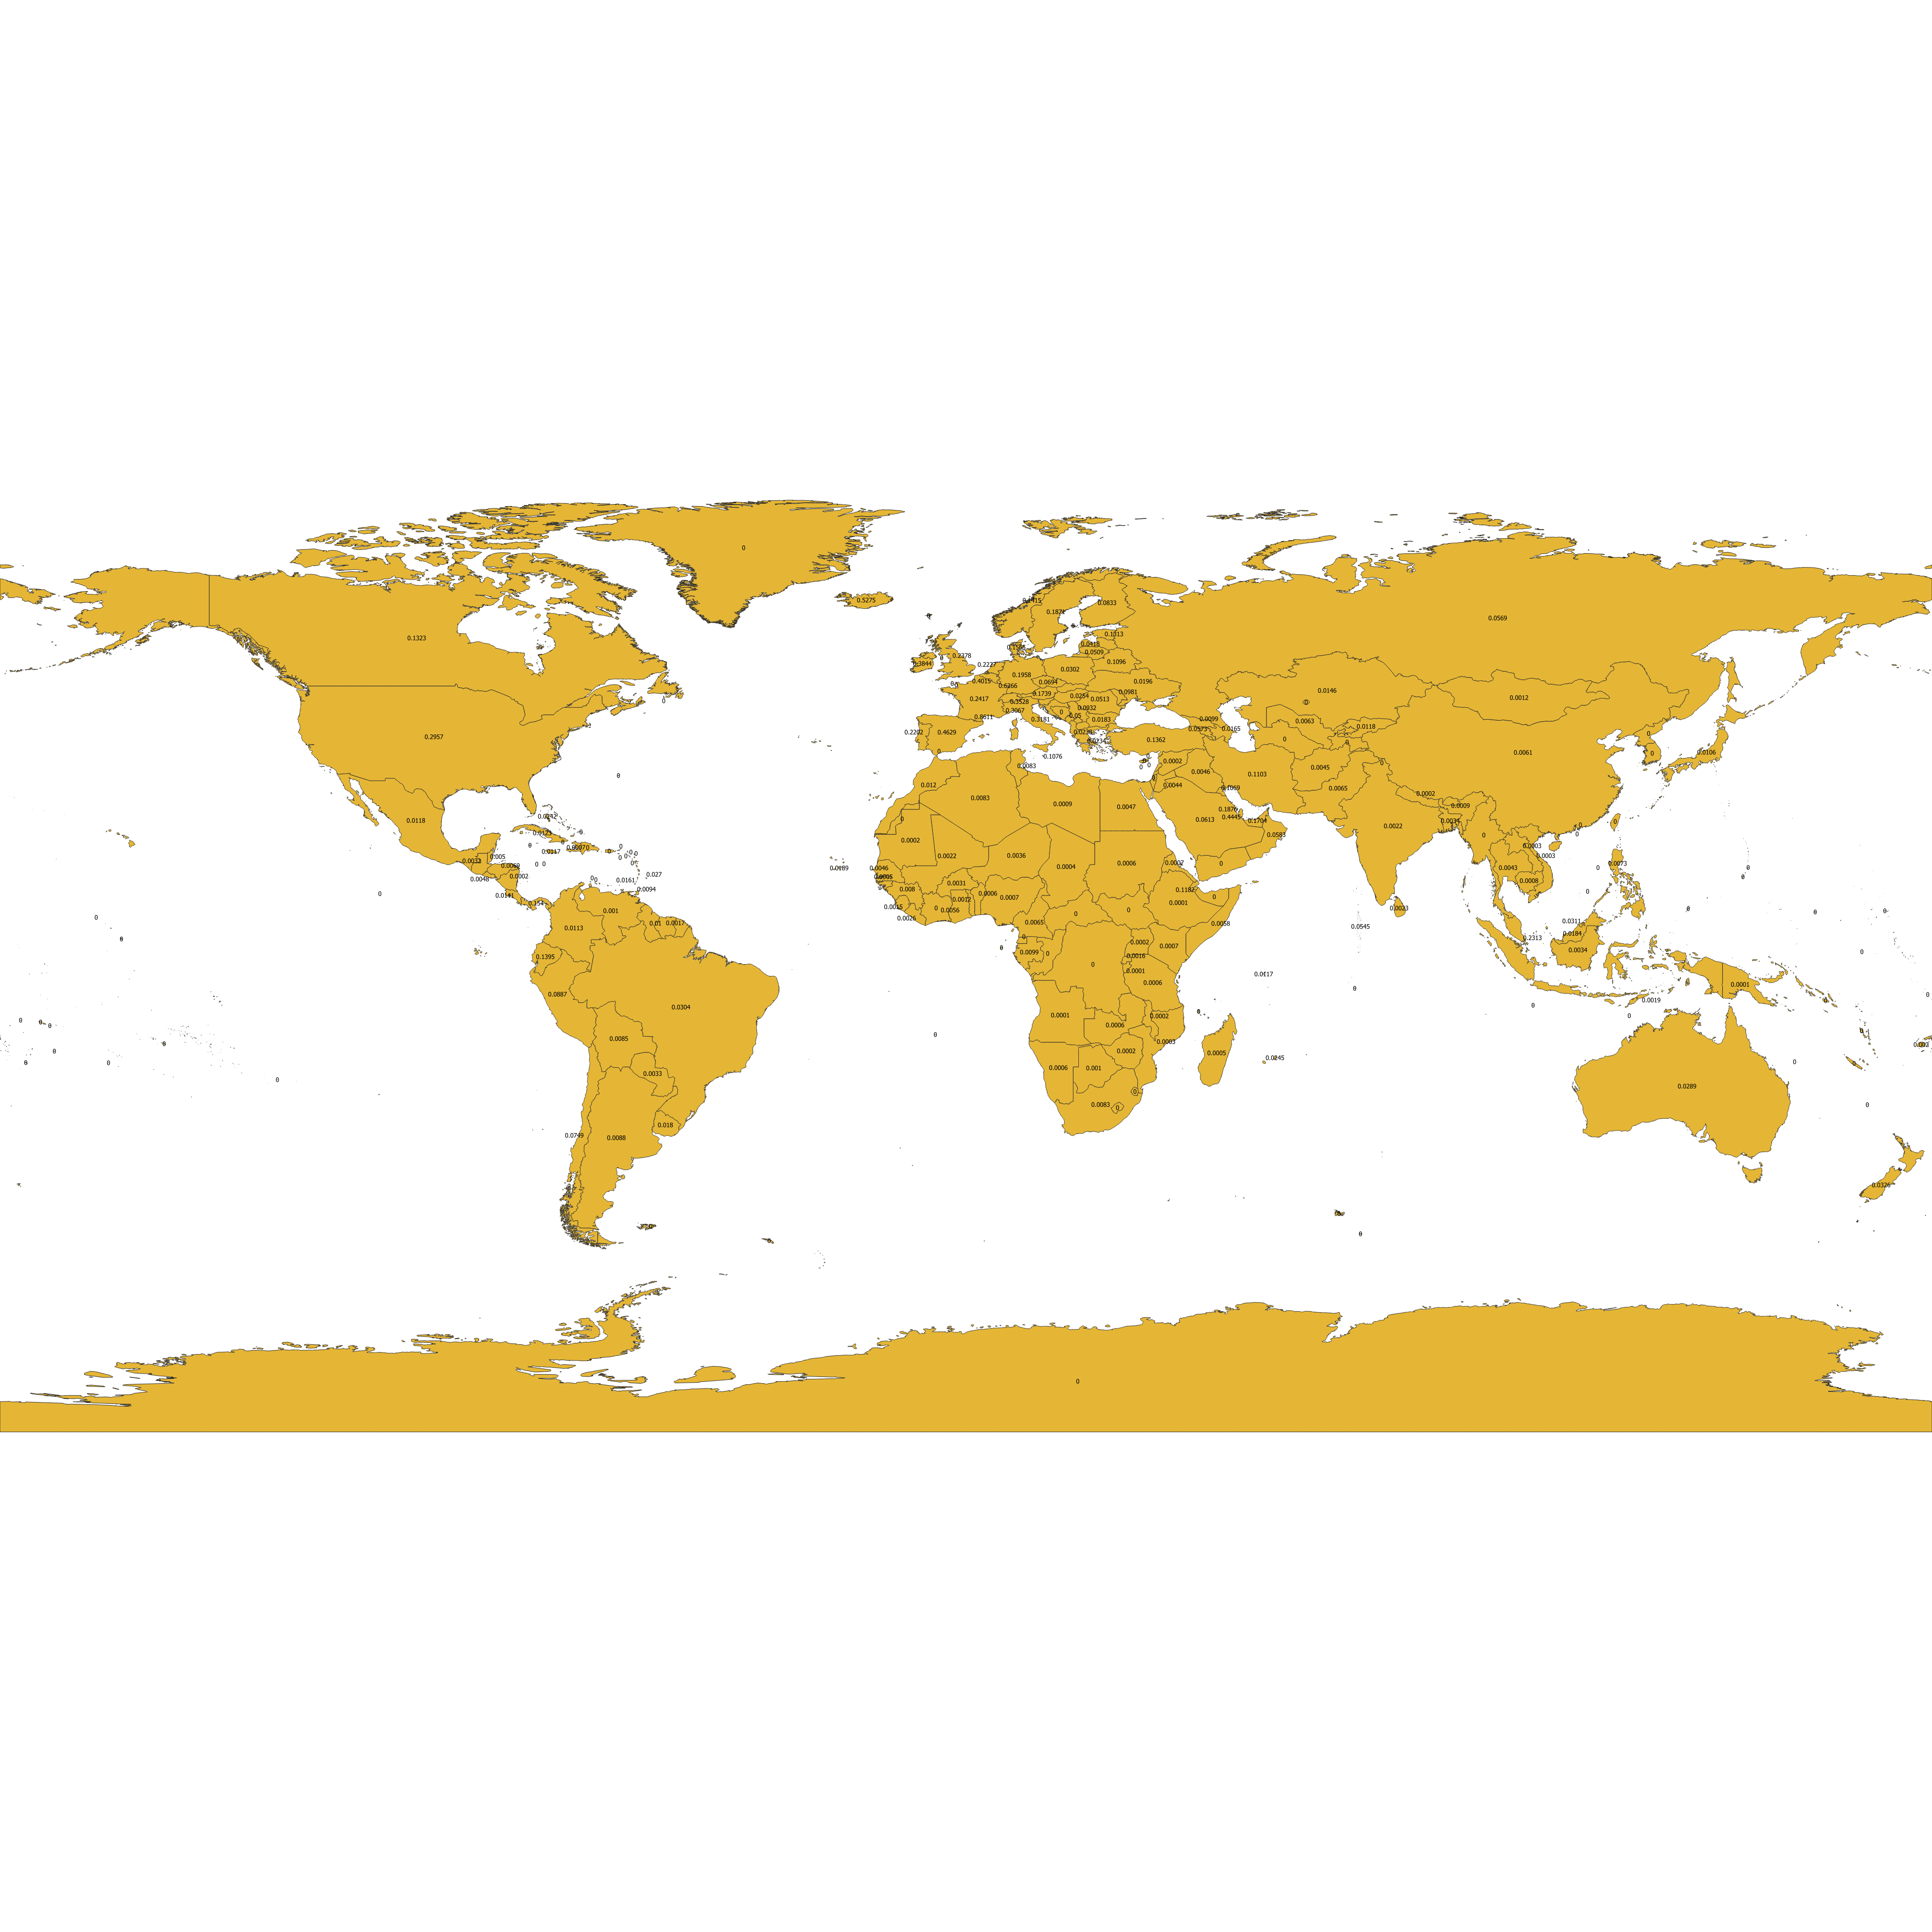

In [25]:

xt=paises.extent()

options = QgsMapSettings()
options.setLayers([paises])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(4024, 4024))


options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

from IPython.display import Image

imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )

with open("result.png", "wb") as fout:
    fout.write(imgbuf.data())

Image( imgbuf.data() )

## Vai gerar um grafico de barras 3d com os infetados por classe economica para todos os dias

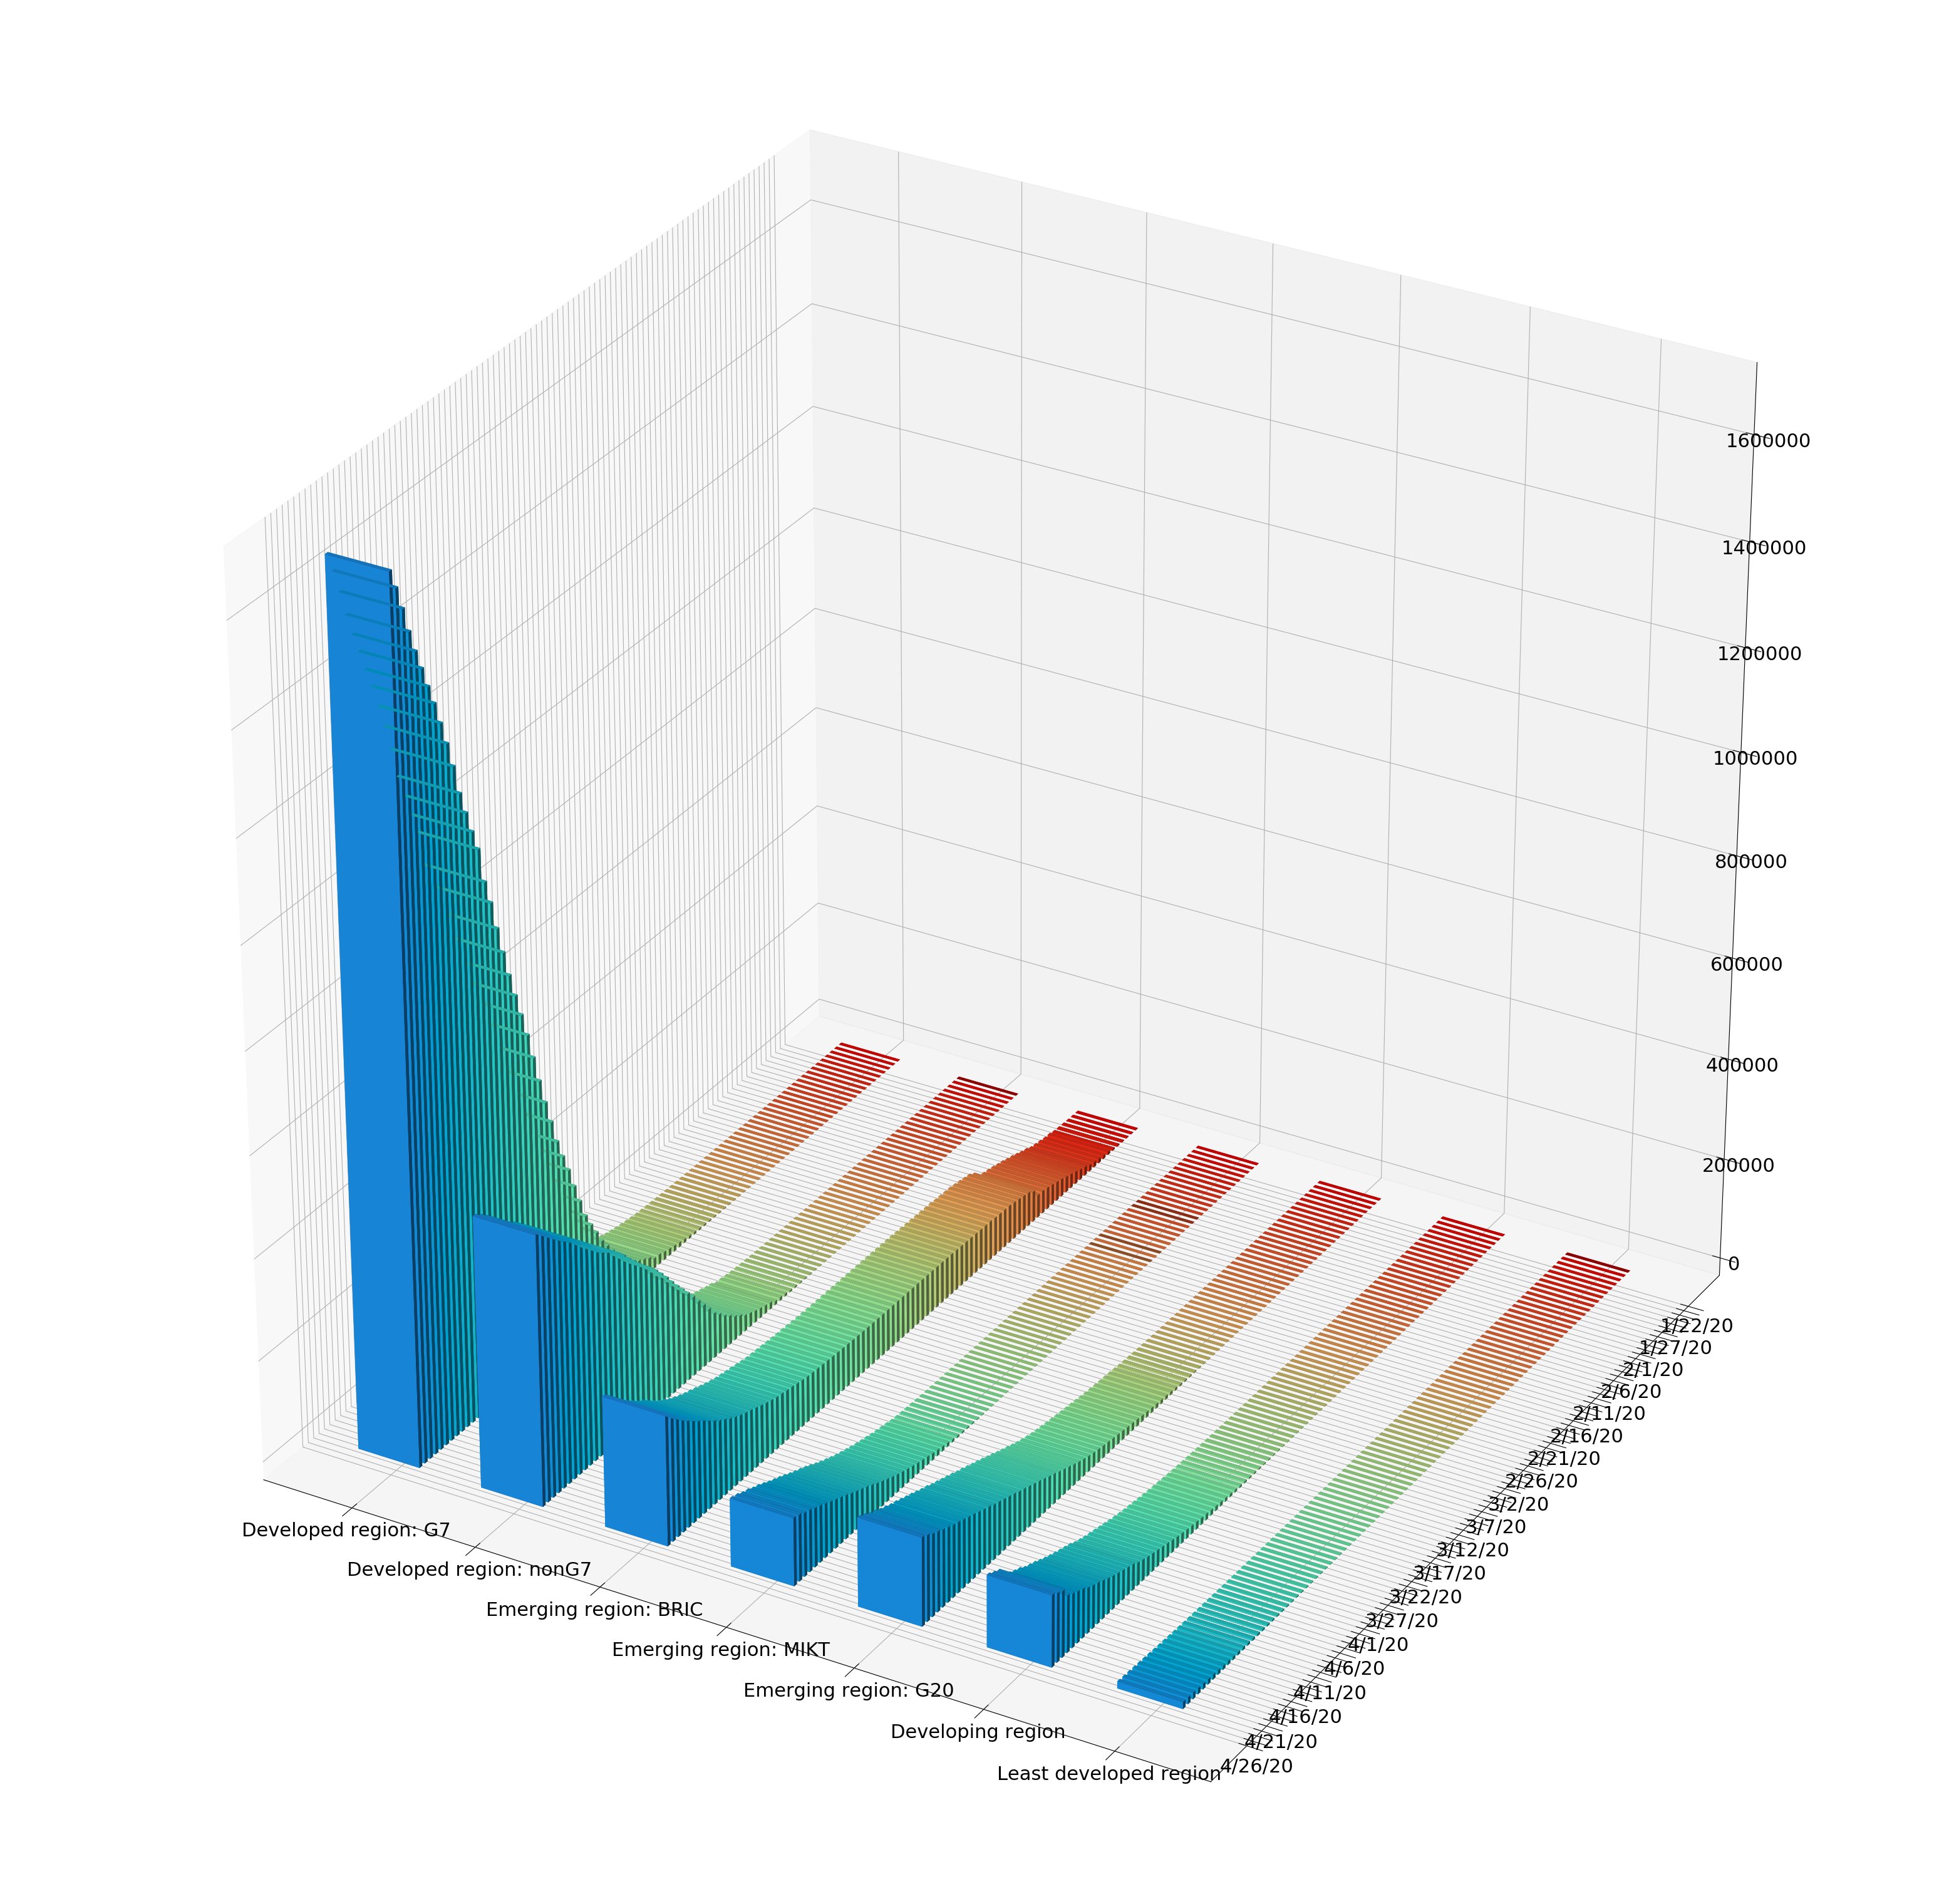

In [26]:
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D

if debug==True:
    for x in dictionary:
        print (x)
        for y in dictionary[x]:
            print (y,':',dictionary[x][y])

ordered_data = sorted(dictionary.items(), key = lambda x:datetime.strptime(x[0], '%m/%d/%y'), reverse=True)

result=[]
datas=[]
i=4
for k,v in ordered_data:
    temp_arr=[]
    for eco in v:
        temp_arr.append(v[eco])
    if i==4:
        datas.append(k)
        i=0
    else:
        datas.append(" ")
        i+=1
    result.append(temp_arr)
        
        

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

plt.rcParams.update({'font.size': 22})

result = np.array(result, dtype=np.int)

fig=plt.figure(figsize=(40, 40), dpi=100)
ax1=fig.add_subplot(111, projection='3d')

xlabels = np.array([
"Developed region: G7",
"Developed region: nonG7",
"Emerging region: BRIC",
"Emerging region: MIKT",
"Emerging region: G20",
"Developing region",
"Least developed region"
])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(datas)
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)

values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)

ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)

plt.savefig('bars.png',dpi=100)

plt.show()
